In [5]:
import requests
from bs4 import BeautifulSoup
import csv
import time
import pandas as pd
import os

## TERMINADO

In [9]:
import requests
from bs4 import BeautifulSoup
import csv
import time

# =========================
#FORMATOS DE FECHA
# =========================
MESES = {
    "enero": "01",
    "febrero": "02",
    "marzo": "03",
    "abril": "04",
    "mayo": "05",
    "junio": "06",
    "julio": "07",
    "agosto": "08",
    "septiembre": "09",
    "octubre": "10",
    "noviembre": "11",
    "diciembre": "12",
}

def normalizar_fecha_escrita(fecha_texto):
    """
    Convierte:
    Escrito en dia de mes de año a dia-mes-año
    """
    if not fecha_texto:
        return ""

    fecha_texto = fecha_texto.lower().replace("escrito en", "").strip()
    partes = fecha_texto.split(" de ")

    if len(partes) != 3:
        return ""

    dia, mes, año = partes
    dia = dia.zfill(2)  
    mes_num = MESES.get(mes, "")

    if not mes_num:
        return ""

    return f"{dia}-{mes_num}-{año}"

# =========================
# URLs 
# =========================
urls = {
    "Vitoria": "https://www.booking.com/reviews/es/hotel/libere-vitoria-centro.es.html",
    "Donosti": "https://www.booking.com/reviews/es/hotel/koisi-hostel.es.html",
    "BilbaoMuseo": "https://www.booking.com/reviews/es/hotel/apartamentos-libere-bilbao-guggenheim.es.html",
    "BilbaoLaVieja": "https://www.booking.com/reviews/es/hotel/apartamentos-libere-bilbao-la-vieja.es.html",
    "ValenciaAbastos": "https://www.booking.com/reviews/es/hotel/apartamentos-libere-valencia-abastos.es.html",
    "PamplonaYamaguchi": "https://www.booking.com/reviews/es/hotel/apartamentos-libere-pamplona-yamaguchi.es.html",
    "ValenciaJardinBotanico": "https://www.booking.com/reviews/es/hotel/apartamentos-libere-valencia-jardin-botanico.es.html",
    "MadridPalacioReal": "https://www.booking.com/reviews/es/hotel/libere-madrid-palacio-real.es.html",
    "MalagaTeatroRomano": "https://www.booking.com/reviews/es/hotel/apartamentosliberemalagateatroromano.es.html",
    "GranadaCatedral": "https://www.booking.com/reviews/es/hotel/apartamentos-libere-granada-catedral.es.html",
    "MalagaLaMerced": "https://www.booking.com/reviews/es/hotel/libere-malaga-la-merced.es.html",
    "CordobaPatio": "https://www.booking.com/reviews/es/hotel/libere-cordoba-patio-santa-marta.es.html",
}

headers = {
    "User-Agent": "Mozilla/5.0",
    "Accept-Language": "es-ES,es;q=0.9",
}

with open("../../Datos/DatosTransformados/comentarios_booking.csv", mode="w", encoding="utf-8", newline="") as f:
    writer = csv.writer(f)

    # Cabecera CSV
    writer.writerow([
        "ubicacion",
        "fecha",
        "puntuacion",
        "titulo_comentario",
        "comentario_negativo",
        "comentario_positivo",
        "etiquetas"
    ])

    # Bucle por ubicación
    for ubicacion, base_url in urls.items():
        print(f"\nScrapeando {ubicacion}")

        page = 1

        # Bucle automático de páginas
        while True:
            print(f"  Página {page}")

            url = f"{base_url}?page={page}"
            response = requests.get(url, headers=headers)
            soup = BeautifulSoup(response.text, "lxml")

            contenedor = soup.select("li.review_item.clearfix")

            if not contenedor:
                print("  No hay más reseñas")
                break

            for reseña in contenedor:

                # FECHA (NORMALIZADA)
                fecha_el = reseña.select_one("p.review_item_date")
                fecha_raw = fecha_el.get_text(strip=True) if fecha_el else ""
                fecha = normalizar_fecha_escrita(fecha_raw)

                # PUNTUACIÓN
                score = reseña.select_one("span.review-score-badge")
                puntuacion = score.get_text(strip=True) if score else ""

                # TÍTULO
                titulo_el = reseña.select_one("span[itemprop='name']")
                titulo = titulo_el.get_text(strip=True) if titulo_el else ""

                # COMENTARIO NEGATIVO
                neg = reseña.select_one("p.review_neg span[itemprop='reviewBody']")
                comentario_negativo = neg.get_text(strip=True) if neg else ""

                # COMENTARIO POSITIVO
                pos = reseña.select_one("p.review_pos span[itemprop='reviewBody']")
                comentario_positivo = pos.get_text(strip=True) if pos else ""

                # ETIQUETAS
                etiquetas = reseña.select("ul.review_item_info_tags li")
                etiquetas_texto = " | ".join(
                    e.get_text(strip=True).replace("•", "").strip()
                    for e in etiquetas
                )

                # Guardar 
                writer.writerow([
                    ubicacion,
                    fecha,
                    puntuacion,
                    titulo,
                    comentario_negativo,
                    comentario_positivo,
                    etiquetas_texto
                ])

            page += 1
            time.sleep(1)

print("\n CSV creado")



Scrapeando Vitoria
  Página 1
  Página 2
  Página 3
  Página 4
  Página 5
  Página 6
  Página 7
  Página 8
  Página 9
  Página 10
  Página 11
  Página 12
  Página 13
  Página 14
  Página 15
  Página 16
  Página 17
  Página 18
  Página 19
  Página 20
  Página 21
  Página 22
  Página 23
  Página 24
  Página 25
  Página 26
  Página 27
  Página 28
  Página 29
  Página 30
  Página 31
  Página 32
  Página 33
  Página 34
  Página 35
  Página 36
  Página 37
  Página 38
  Página 39
  Página 40
  Página 41
  Página 42
  Página 43
  Página 44
  No hay más reseñas

Scrapeando Donosti
  Página 1
  Página 2
  Página 3
  Página 4
  Página 5
  Página 6
  Página 7
  Página 8
  Página 9
  Página 10
  Página 11
  Página 12
  Página 13
  Página 14
  Página 15
  Página 16
  Página 17
  Página 18
  Página 19
  No hay más reseñas

Scrapeando BilbaoMuseo
  Página 1
  Página 2
  Página 3
  Página 4
  Página 5
  No hay más reseñas

Scrapeando BilbaoLaVieja
  Página 1
  Página 2
  Página 3
  Página 4
  Página 5

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../../Datos/DatosTransformados/comentarios_booking.csv")

print(df.head())
print(df.info())



  ubicacion       fecha puntuacion titulo_comentario  \
0   Vitoria  12-12-2025        7,0           Montero   
1   Vitoria  11-12-2025        7,0             Gómez   
2   Vitoria  10-12-2025        9,0          Cristina   
3   Vitoria  08-12-2025         10            Manuel   
4   Vitoria  08-12-2025        8,0              Jose   

                                 comentario_negativo  \
0  No me gustó pagar un precio de 4 personas por ...   
1  En mi reserva pone escritorio, y no tuve, viaj...   
2  Lo único malo fue que el nórdico del sofá cama...   
3                                          Almohadas   
4  El tener que hacer el check-in uno mismo, aunq...   

                                 comentario_positivo  \
0  Lo que mas me gustó fue la ubicación ya que no...   
1                                                NaN   
2  Ubicación excelente. Muy limpio, la cama muy c...   
3                              Limpieza y decoración   
4  Me gusto, la limpieza, centrico. A 10 minut

In [11]:
df["fecha"] = pd.to_datetime(df["fecha"], format="%d-%m-%Y", errors="coerce")

df["puntuacion"] = (
    df["puntuacion"]
    .str.replace(",", ".", regex=False)
    .astype(float)
)


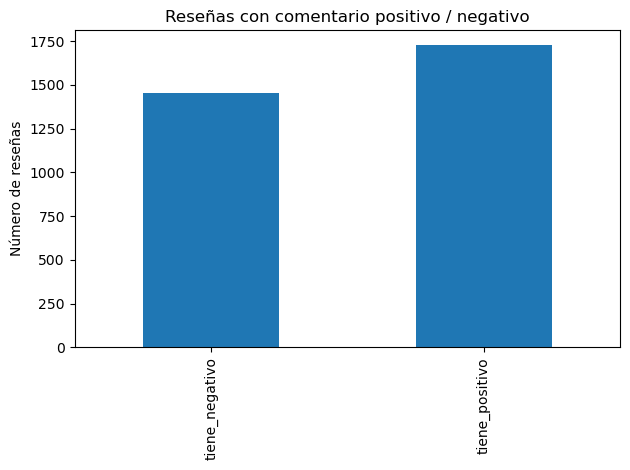

In [12]:
df["tiene_negativo"] = df["comentario_negativo"].str.len() > 0
df["tiene_positivo"] = df["comentario_positivo"].str.len() > 0

conteo = df[["tiene_negativo", "tiene_positivo"]].sum()

conteo.plot(
    kind="bar",
    title="Reseñas con comentario positivo / negativo"
)

plt.ylabel("Número de reseñas")
plt.tight_layout()
plt.show()


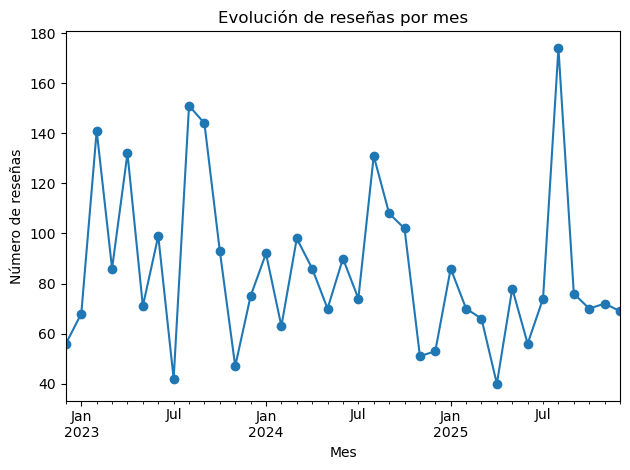

In [13]:
df_por_fecha = df.groupby(df["fecha"].dt.to_period("M")).size()

df_por_fecha.plot(
    title="Evolución de reseñas por mes",
    marker="o"
)

plt.ylabel("Número de reseñas")
plt.xlabel("Mes")
plt.tight_layout()
plt.show()


In [14]:
df_por_fecha = df.groupby(df["fecha"].dt.to_period("M")).size()


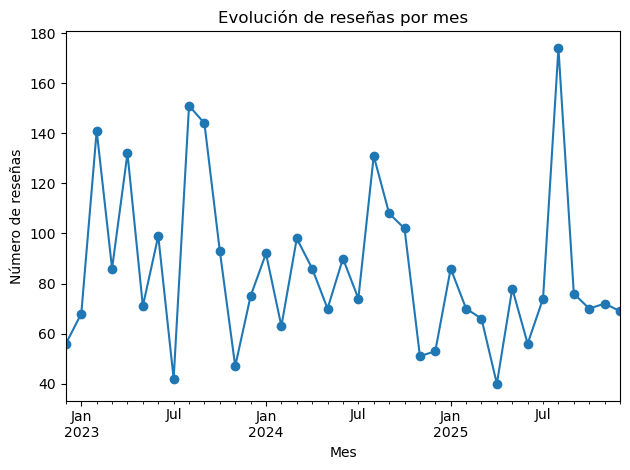

In [15]:
df_por_fecha = df.groupby(df["fecha"].dt.to_period("M")).size()

df_por_fecha.plot(
    title="Evolución de reseñas por mes",
    marker="o"
)

plt.ylabel("Número de reseñas")
plt.xlabel("Mes")
plt.tight_layout()
plt.show()


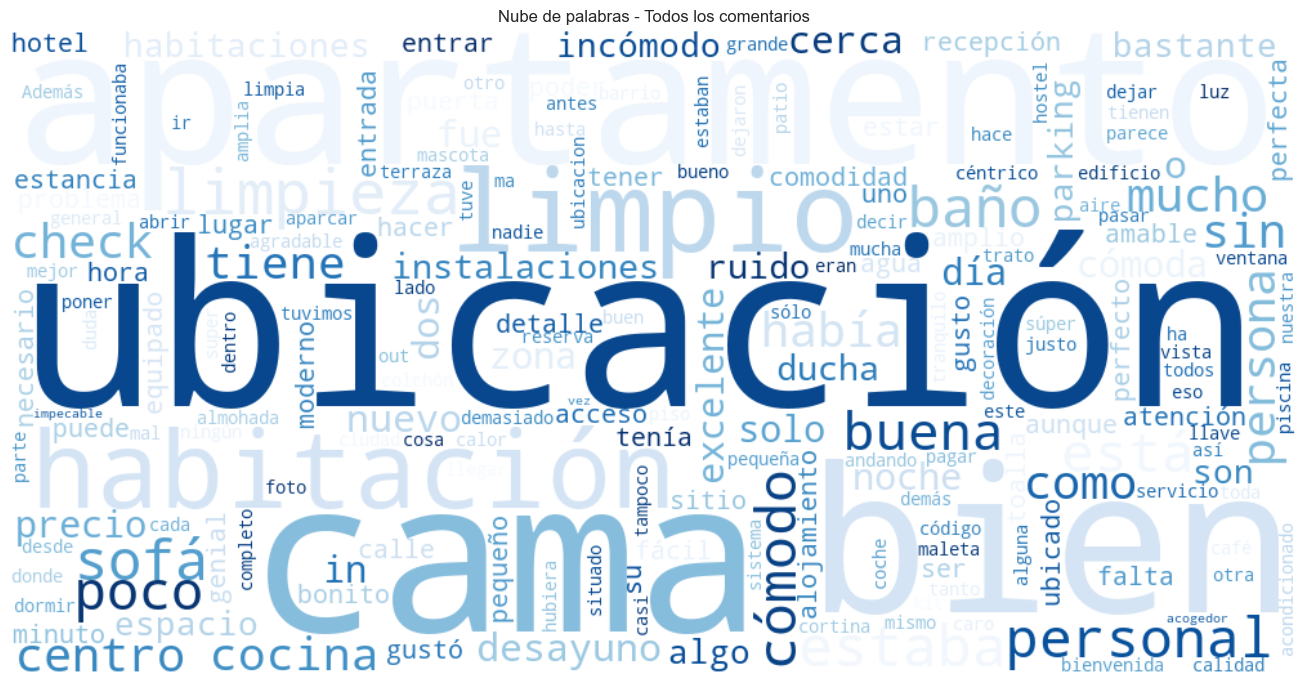

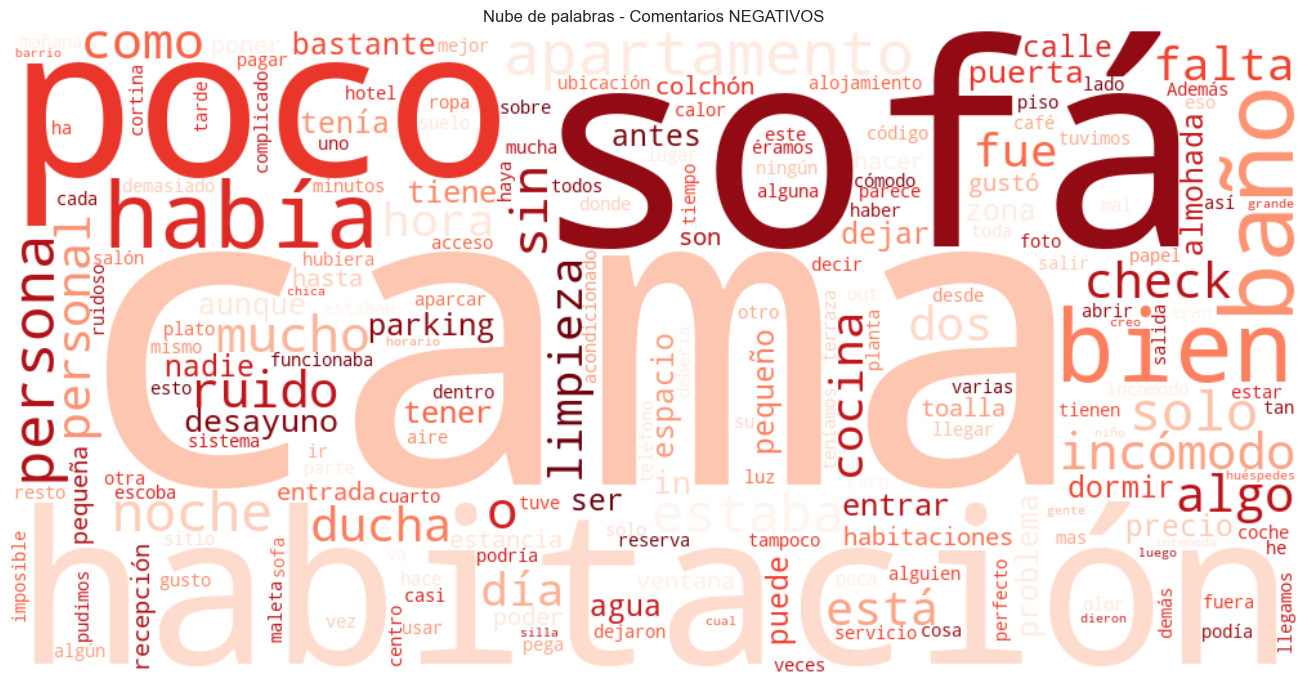

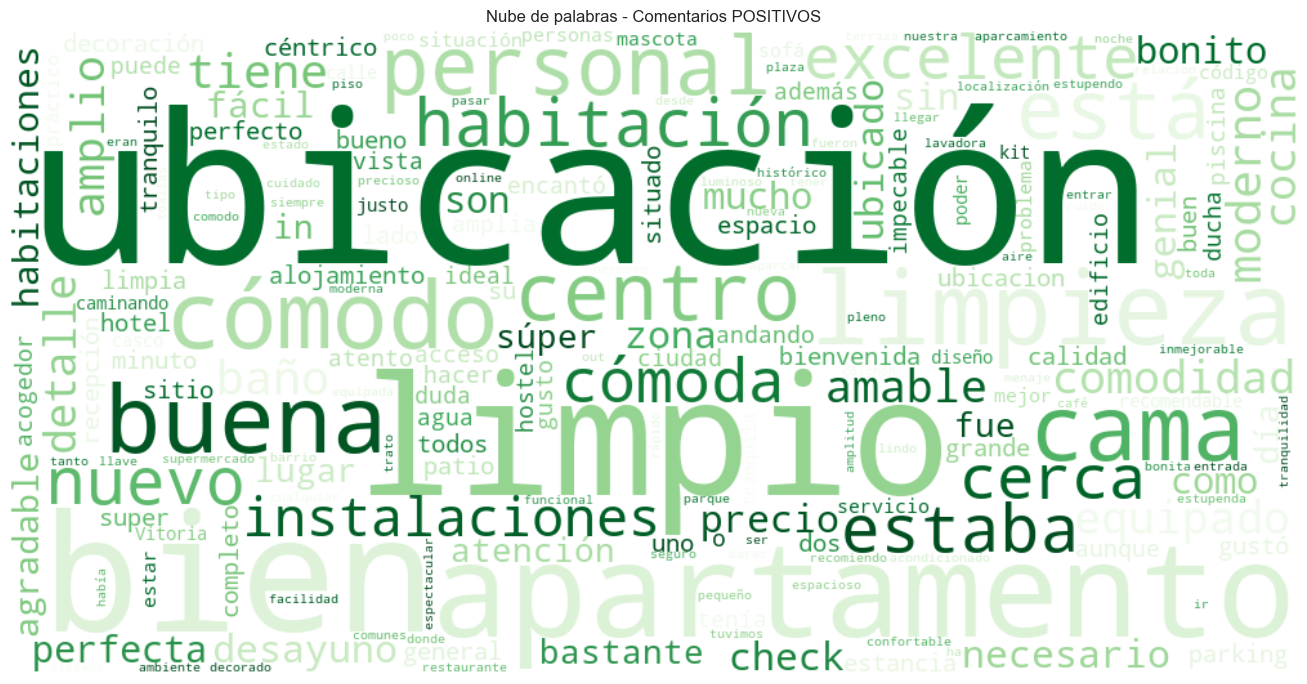

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Estilo global (seaborn)
sns.set_theme(style="whitegrid")


# =========================
# CARGA DE DATOS
# =========================
df = pd.read_csv("../../Datos/DatosTransformados/comentarios_booking.csv")

# Aseguramos que no haya NaN
df["comentario_negativo"] = df["comentario_negativo"].fillna("")
df["comentario_positivo"] = df["comentario_positivo"].fillna("")


# =========================
# STOPWORDS
# =========================
STOPWORDS_ES = {
    "de", "la", "el", "y", "a", "en", "que", "es", "un", "una",
    "por", "para", "con", "no", "se", "los", "las", "muy",
    "todo", "más", "menos", "pero", "también", "ya",
    "al", "del", "lo", "le", "les", "me", "nos", "hay", "q", "te", "do", "ni", "era", "si", "porque", "esta", "nada", "cuando", "mi"
}


# =========================
# FUNCIÓN PARA WORDCLOUD
# =========================
def generar_wordcloud(
    texto,
    titulo,
    colormap="viridis",
    width=1000,
    height=500
):
    """
    Genera y muestra una nube de palabras
    """
    wordcloud = WordCloud(
        width=width,
        height=height,
        background_color="white",
        stopwords=STOPWORDS_ES,
        colormap=colormap,
        collocations=False
    ).generate(texto)

    plt.figure(figsize=(14, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(titulo)
    plt.tight_layout()
    plt.show()


# =========================
# 5NUBES DE PALABRAS
# =========================

#TODOS LOS COMENTARIOS
texto_total = (
    df["comentario_negativo"] + " " + df["comentario_positivo"]
).str.cat(sep=" ")

generar_wordcloud(
    texto=texto_total,
    titulo="Nube de palabras - Todos los comentarios",
    colormap="Blues"
)

# SOLO COMENTARIOS NEGATIVOS
texto_neg = " ".join(df["comentario_negativo"])

generar_wordcloud(
    texto=texto_neg,
    titulo="Nube de palabras - Comentarios NEGATIVOS",
    colormap="Reds"
)

# SOLO COMENTARIOS POSITIVOS
texto_pos = " ".join(df["comentario_positivo"])

generar_wordcloud(
    texto=texto_pos,
    titulo="Nube de palabras - Comentarios POSITIVOS",
    colormap="Greens"
)
